# simplot example

Code for *Modeling and Simulation in Python*

by Allen B. Downey, available from http://greenteapress.com

Copyright 2017 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np


In [2]:
def underride(kwargs, option, value):
    if option not in kwargs:
        kwargs[option] = value

In [3]:
def color_dict():
    return dict(b='blue', g='green', r='red', c='cyan', 
                m='magenta', y='yellow', k='black', w='white')

    # http://colorbrewer2.org/?type=qualitative&scheme=Set3&n=10
    return dict(b='#80b1d3', g='#b3de69', r='#fb8072', c='#8dd3c7', 
                m='#bc80bd', y='#fdb462', k='#696969', w='#d9d9d9')

def get_color(style, kwargs, d=color_dict()):
    color = kwargs.get('color')
    if color is not None:
        return color
    
    for key, value in d.items():
        if key in style:
            return value
    
    return '#80b1d3'

In [4]:
class FigureMap:
    
    def __init__(self):
        self.figures = dict()
        
    def get_linemap(self, figure=None):
        if figure is None:
            figure = plt.gca()
            
        figure_map = self.figures.get(figure)
        if figure_map == None:
            figure_map = LineMap()
            self.figures[figure] = figure_map
            
        return figure_map
    
figure_map = FigureMap()

In [5]:
class LineMap:
    
    def __init__(self):
        self.lines = dict()
        
    def get_line(self, style, kwargs):
        color = get_color(style, kwargs)
        line = self.lines.get(color, None)
        
        if line is None:
            lines = plt.plot([], style, **kwargs)
            line = lines[0]
            self.lines[color] = line
        return line
    
# line_map = LineMap()

In [22]:
def plot(x, y, style='bo-', **kwargs):
    figure = plt.gcf()
    line_map = figure_map.get_linemap(figure)
    
    line = line_map.get_line(style, kwargs)
    xs = line.get_xdata()
    xs = np.append(xs, x)
    line.set_xdata(xs)
    
    ys = line.get_ydata()
    ys = np.append(ys, y)
    line.set_ydata(ys)
    
    #print(line.get_xdata())
    #print(line.get_ydata())
    
    axes = plt.gca()
    axes.relim()
    axes.autoscale_view()
    figure.canvas.draw()
    
def newplot():
    plt.figure()

<IPython.core.display.Javascript object>


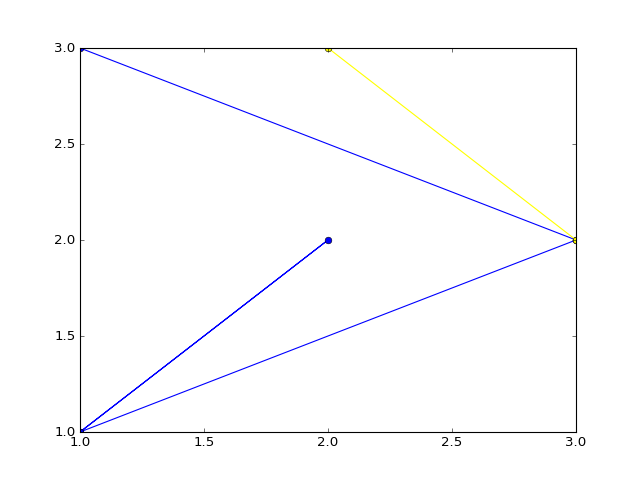

In [7]:
plot(1, 1, 'bo-')

In [8]:
plot(2, 2, 'bo')

In [9]:
plot(1, 1, 'bo-')

In [10]:
plot(3, 2, 'bo-')

In [11]:
plot(3, 2, color='yellow')

In [12]:
plot(2, 3, color='yellow')

In [13]:
plot(1, 3)

<IPython.core.display.Javascript object>


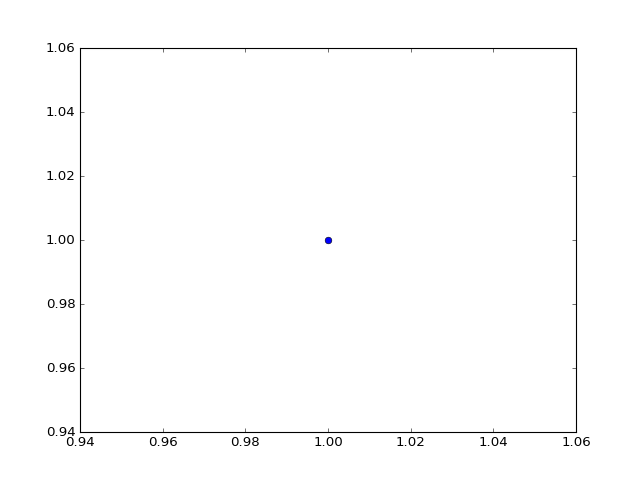

In [14]:
figure2 = plt.figure()

In [15]:
plot(1, 1)

<IPython.core.display.Javascript object>


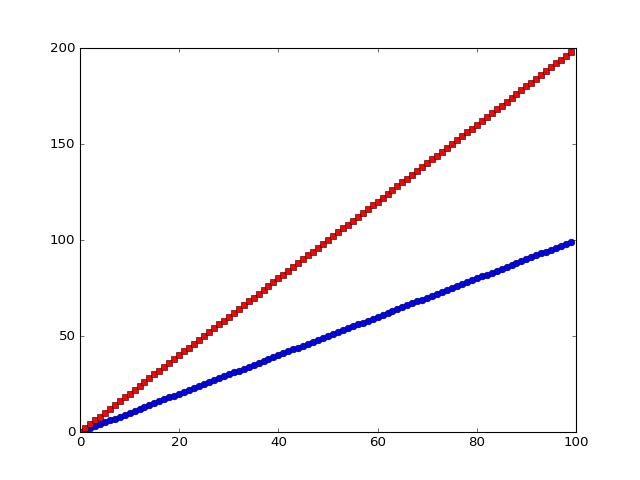

In [16]:
plt.figure()

for i in range(100):
    plot(i, i, 'bo-')
    plot(i, 2*i, 'rs-')

<IPython.core.display.Javascript object>


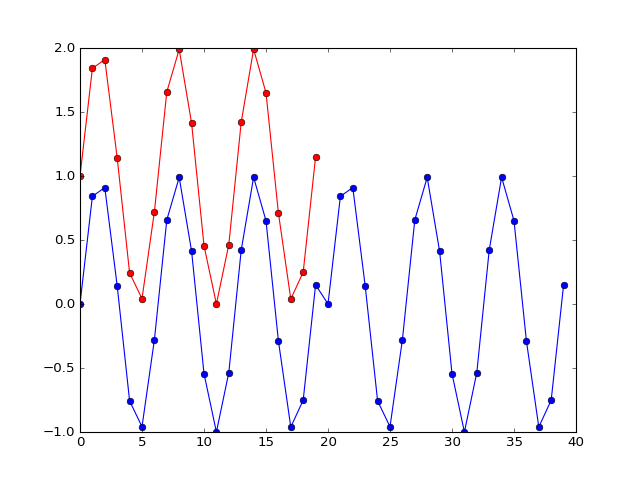

<IPython.core.display.Javascript object>


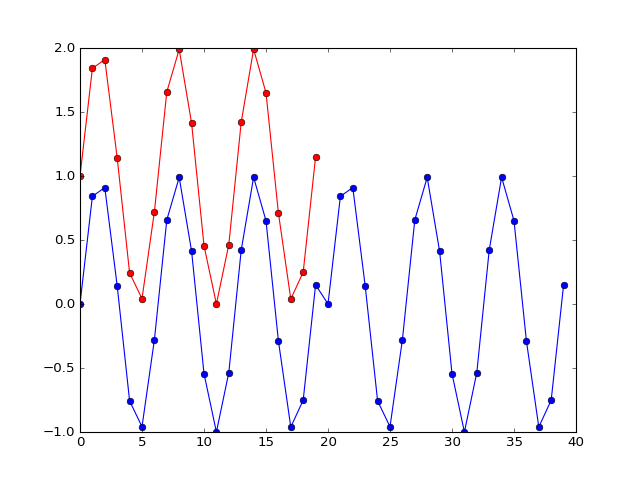

In [17]:
plt.figure()

In [18]:
xs = np.arange(20)
ys = np.sin(xs)
plot(xs, ys)

In [19]:
plot(xs, ys+1, color='red')

In [20]:
plot(xs+20, ys)